# Grover's Search Algorithm
This algorithm performs a search on an unstructured database / dataset and provides a quadratic boost in computation.

### Imports

In [30]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

### Preparing the dataset
Here we have a list of integers and a target number to be found.

In [22]:
numbers = [3, 7, 2, 1, 8, 5, 9, 4]
target_number = 5
target_index = numbers.index(target_number)
marked_state = f"{target_index:03b}"
print(f"Marked state: {marked_state}")

Marked state: 101


### Oracle
This function marks the target index. In other words, it flips the phase of the target phase.

In [23]:
def oracle(circuit: QuantumCircuit, n: int, marked_state: str):
    for i in range(n):
       if marked_state[i] == '0':
           circuit.x(i) 
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)
    for i in range(n):
        if marked_state[i] == '0':
            circuit.x(i)

### Grover Diffusion
This function reflects the quantum state about the average amplitude. In other words, it amplifies the marked state.

In [24]:
def grover_diffusion(circuit: QuantumCircuit, n: int):
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))

### Preparing the Circuit

In [25]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit.h(range(n))
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

### Passing the circuit through the Oracle

In [26]:
oracle(grover_circuit, n, marked_state)
grover_circuit.draw()

┌───┐               
q_0: ┤ H ├───────■───────
     ├───┤┌───┐  │  ┌───┐
q_1: ┤ H ├┤ X ├──■──┤ X ├
     ├───┤├───┤┌─┴─┐├───┤
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘

### Passing the circuit through the Grover Diffusion

In [27]:
grover_diffusion(grover_circuit, n)
grover_circuit.draw()

┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

### Iterating sqrt(2^n)-1 times

In [28]:
for _ in range(int(np.sqrt(2**n))-1):
    oracle(grover_circuit, n, marked_state)
    grover_diffusion(grover_circuit, n)
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
   q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
        ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤»
   q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
        ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
   q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
        └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
meas: 3/══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ┌───┐               ┌───┐┌───┐      ░ ┌─┐      
«   q_0: ┤ X ├────────────■──┤ X ├┤ H ├──────░─┤M├──────
«        ├───┤┌───┐       │  ├───┤├───┤      ░ └╥┘┌─┐   
«   q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├───
«        ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
«        └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
«meas: 3/═══════════════════════════════════════╩══╩══╩═
«                                               0  1  2

### Simulating the output
Here, the marked state should have the most count

In [31]:
simulator = AerSimulator(method='statevector')
job = simulator.run(grover_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print("Measurement counts: ", counts)

Measurement counts:  {'010': 4, '000': 7, '110': 9, '100': 7, '001': 6, '011': 4, '111': 14, '101': 973}


### Plotting the counts

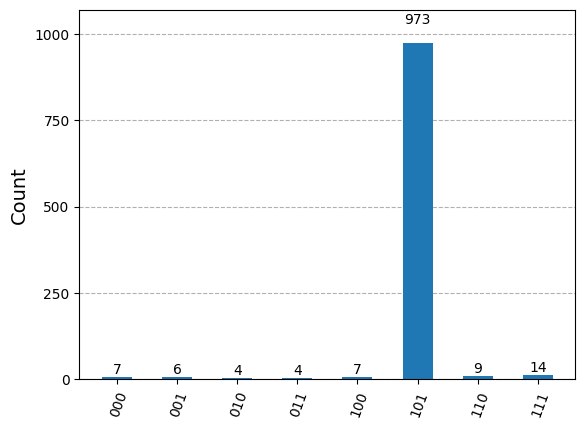

In [32]:
plot_histogram(counts)